In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('./data/Maternal_Health_Risk_Data_Set.csv')

In [128]:
X_features = ['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate']
df['RiskLevel'].value_counts()
df.drop(df[df['HeartRate'] < 50].index)
RiskLabels = ['low risk', 'mid risk', 'high risk']
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


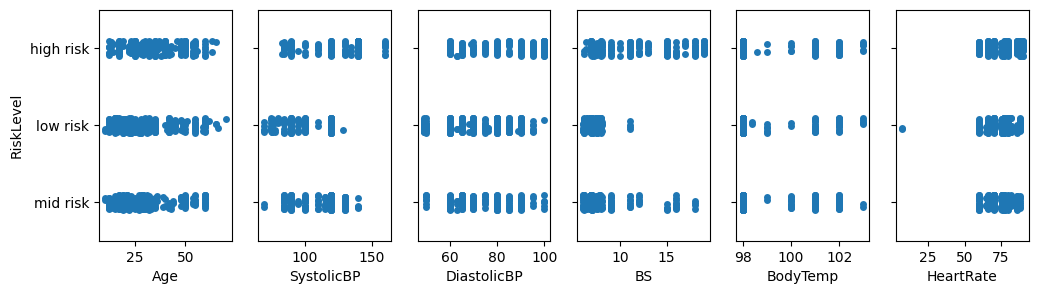

In [129]:
fig,axes=plt.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(len(axes)):
    sns.stripplot(data= df, x=X_features[i], y=df['RiskLevel'], ax=axes[i])

In [130]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [131]:
X = df.loc[: , df.columns!='RiskLevel']
y = df['RiskLevel']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (811, 6)
X_test dimension=  (203, 6)
y_train dimension=  (811,)
y_train dimension=  (203,)


In [132]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.8669950738916257
